# Data Analysis

## Notebook Settings

### Import Libraries

In [2]:
import tensorflow as tf
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

2.5.0


### Seed for reproducibility

In [3]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

## Data Exploration

In [4]:

df = pd.read_csv("Training.csv")

In [5]:
print(df.shape) 
df.head(10)    

(68528, 7)


,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
0,7.97698,4.33494,10.67282,1.76692,3.22440,51.681460,3.65434
1,8.07824,4.44616,10.56160,1.70716,3.32566,51.563598,3.47672
2,8.02844,4.22372,10.56160,1.64906,3.17460,50.863080,3.47672
3,8.02844,4.22372,10.56160,1.70716,3.17460,45.841581,3.47672
4,7.87572,4.44616,10.45038,1.70716,3.27586,47.126421,3.47672
5,7.82592,4.22372,10.11672,1.64906,3.12314,47.010218,3.41862
6,7.52214,4.11250,9.89428,1.58930,3.22440,46.892360,3.24100
7,7.31962,4.00128,9.56062,1.53120,3.12314,45.959439,3.24100
8,7.26982,3.89006,9.56062,1.58930,3.02188,47.126421,3.12314
9,7.26982,4.00128,9.56062,1.70716,2.97208,46.659961,3.24100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68528 entries, 0 to 68527
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sponginess          68528 non-null  float64
 1   Wonder level        68528 non-null  float64
 2   Crunchiness         68528 non-null  float64
 3   Loudness on impact  68528 non-null  float64
 4   Meme creativity     68528 non-null  float64
 5   Soap slipperiness   68528 non-null  float64
 6   Hype root           68528 non-null  float64
dtypes: float64(7)
memory usage: 3.7 MB


In [7]:
df.at[1,"Sponginess"] #access a specific element
df.columns #see all the columns
df.loc[:,"Sponginess"]

0        7.97698
1        8.07824
2        8.02844
3        8.02844
4        7.87572
          ...   
68523    6.30868
68524    6.40994
68525    6.76352
68526    6.86478
68527    7.16856
Name: Sponginess, Length: 68528, dtype: float64

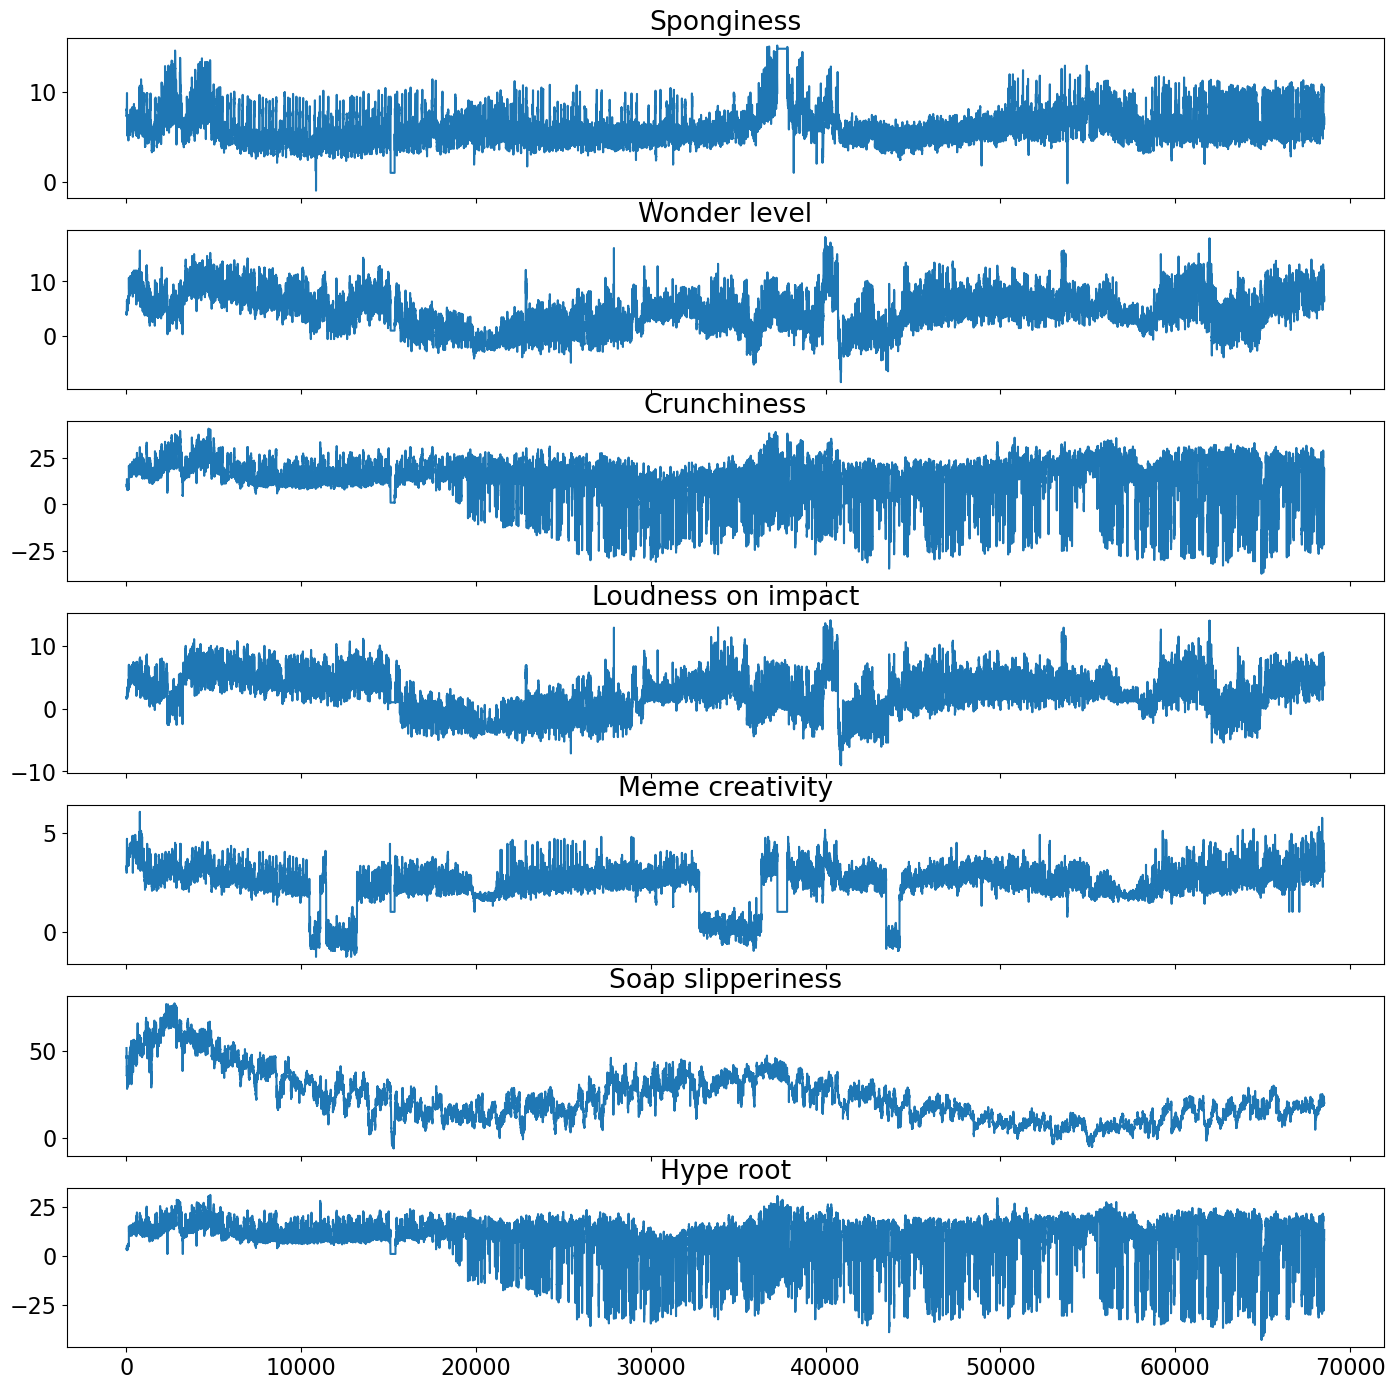

In [8]:
def inspect_dataframe(df, columns):
    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(df[col])
        axs[i].set_title(col)
    plt.show()
inspect_dataframe(df, df.columns)

### Correlation Analysis

In [9]:
stocks = df["Sponginess"].to_frame('SPONG')
stocks = stocks.join(df["Wonder level"].to_frame('WONDLEV'))
stocks = stocks.join(df["Crunchiness"].to_frame('CRUNCH'))
stocks = stocks.join(df["Loudness on impact"].to_frame('LOUD'))
stocks = stocks.join(df["Meme creativity"].to_frame('MEME'))
stocks = stocks.join(df["Soap slipperiness"].to_frame('SOAP'))
stocks = stocks.join(df["Hype root"].to_frame('HYPE'))

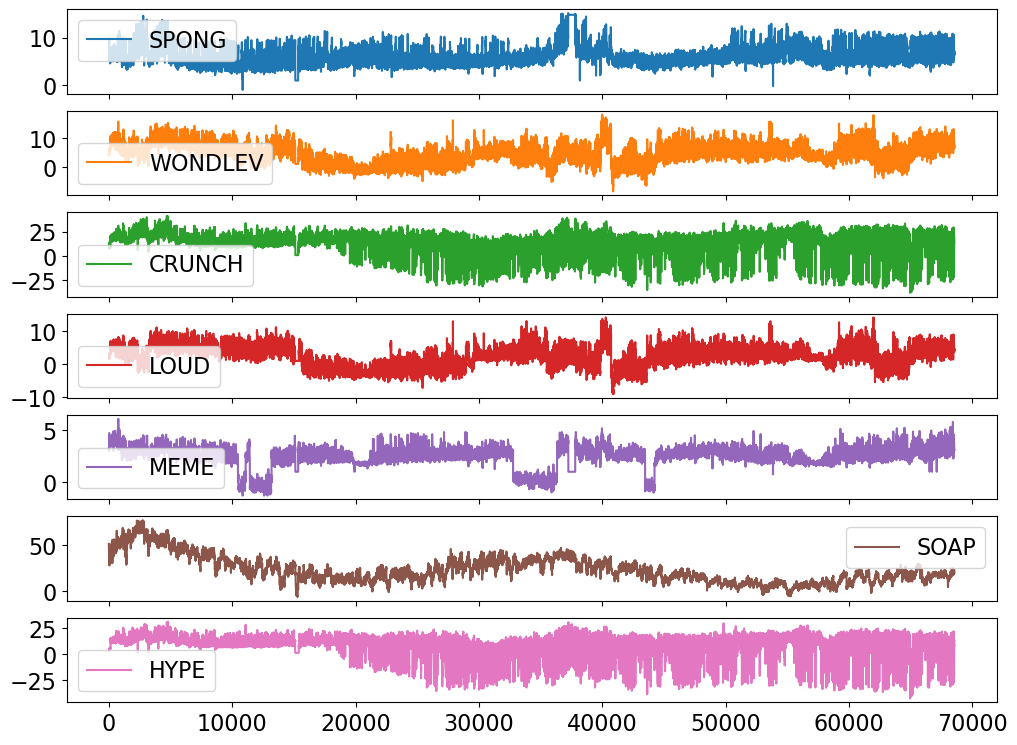

In [10]:
figsize=(12,9)
stocks.plot(figsize=figsize,subplots=True);
plt.show();

In [11]:
percentage_change = stocks.pct_change().dropna()  

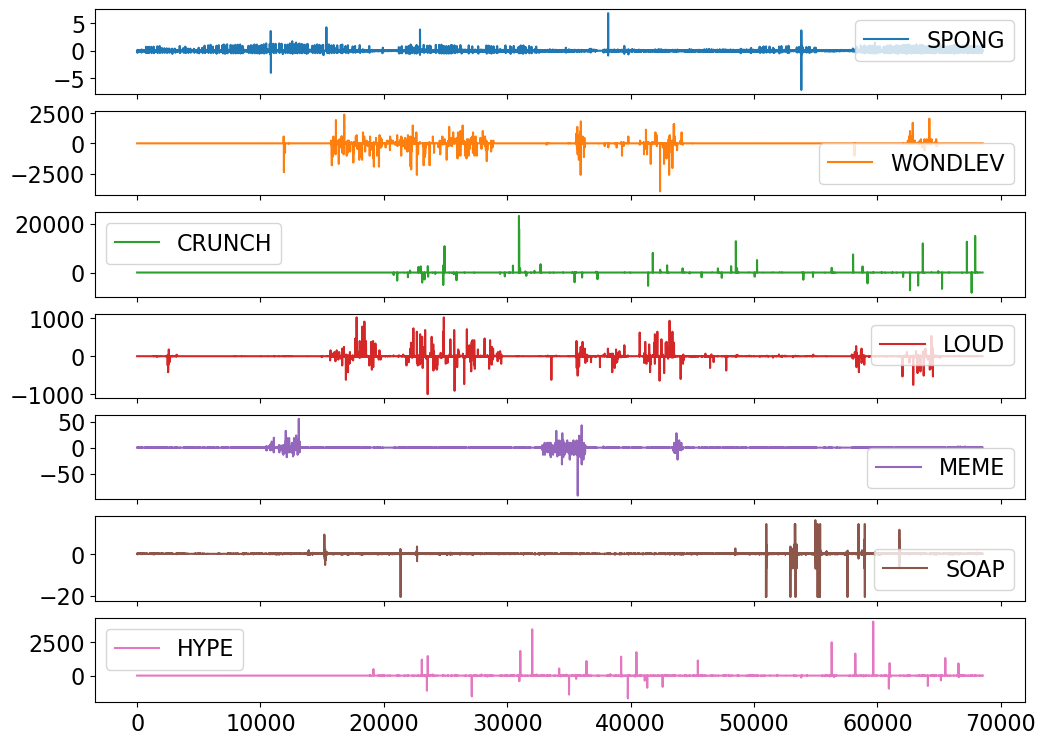

In [12]:
percentage_change.plot(figsize=figsize,subplots=True);
plt.show();

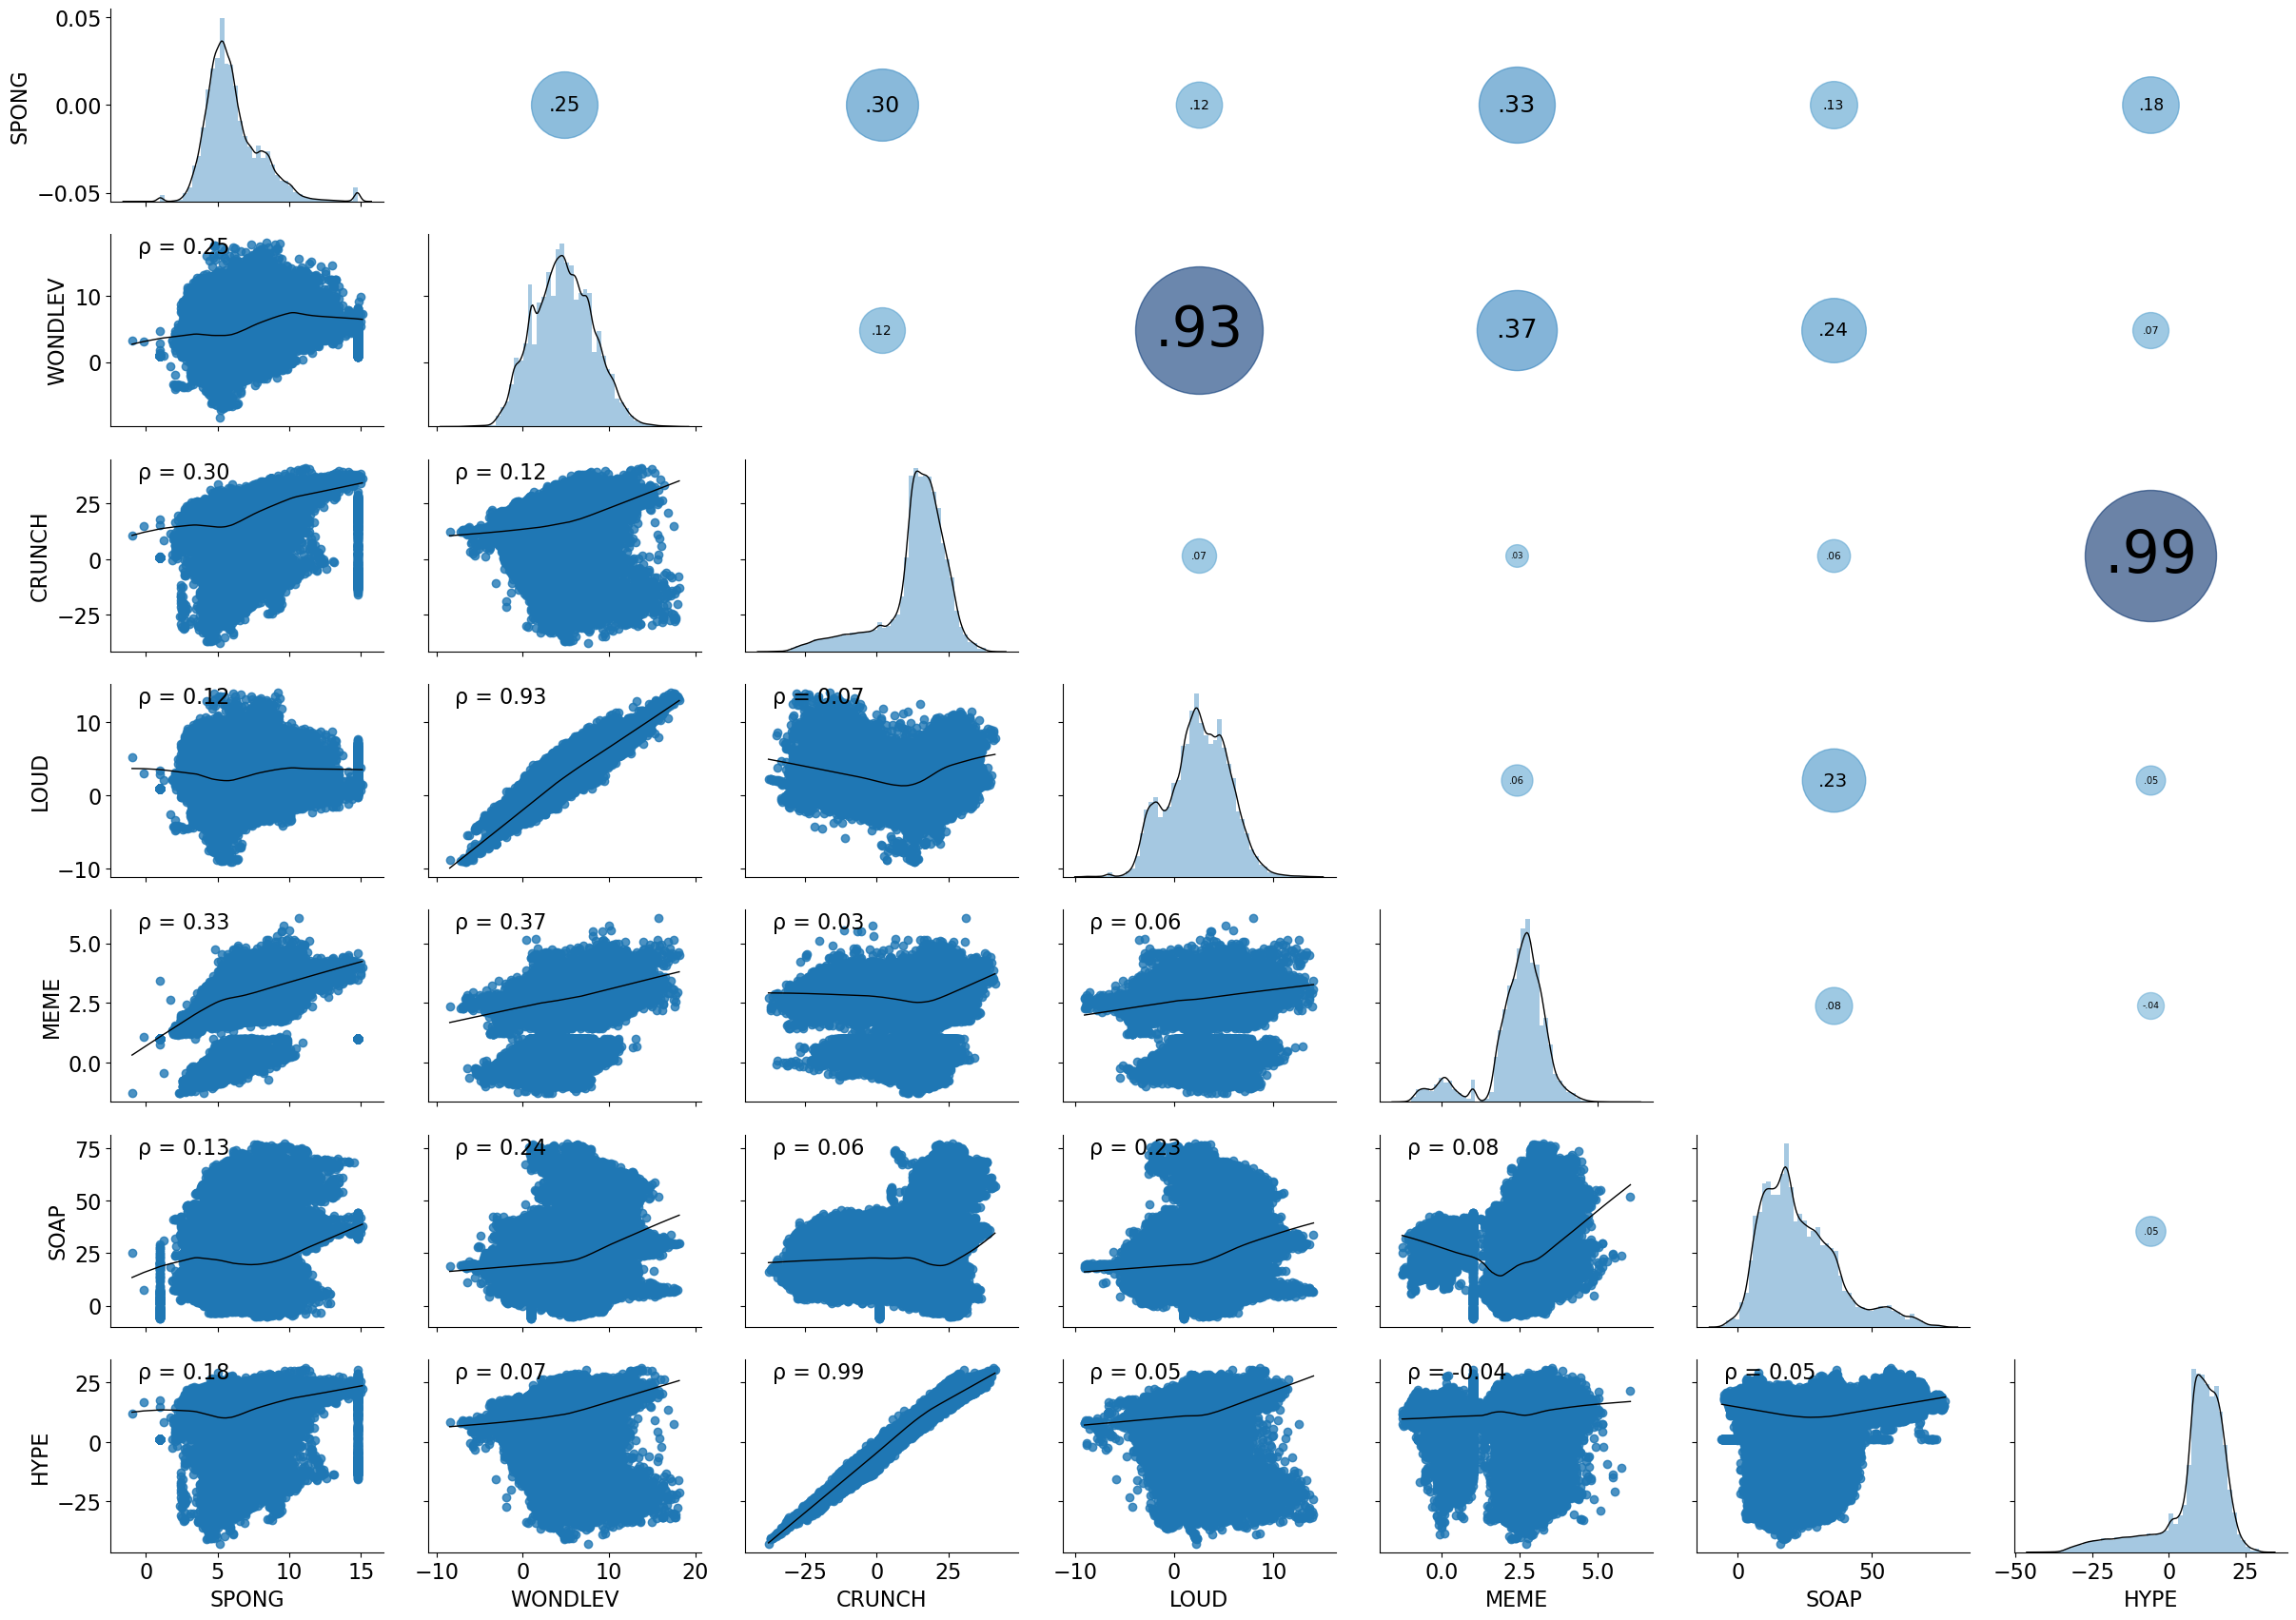

In [13]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)    
    
# g = sns.pairplot(stocks,palette=["Blues_d"])
g = sns.PairGrid(stocks, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

In [14]:
def ADFuller(df):
    index=df.index
    columns = df.columns
    df_stats = pd.DataFrame(columns=['p-value'], index=columns)
    for col in columns:
        df_stats.loc[col]=adfuller(df[col], autolag='AIC')[1]
    return df_stats

In [15]:
ADFuller(stocks)

,p-value
SPONG,0.0
WONDLEV,0.0
CRUNCH,0.0
LOUD,0.0
MEME,0.0
SOAP,0.000778
HYPE,0.0


### Autocorrelation Analysis

In [16]:
stocks['SPONG'].autocorr()

0.9701337114852366

In [17]:
#columns=["SPONG","WONDLEV","CRUNCH","LOUD","MEME","SOAP","HYPE"]

for st in stocks.columns:
    print(st+":");
    print(stocks[st].autocorr())

SPONG:
0.9701337114852366
WONDLEV:
0.961112313989103
CRUNCH:
0.9761957058430962
LOUD:
0.9606696267165752
MEME:
0.9801841446614559
SOAP:
0.9986492475183217
HYPE:
0.9759879450755747


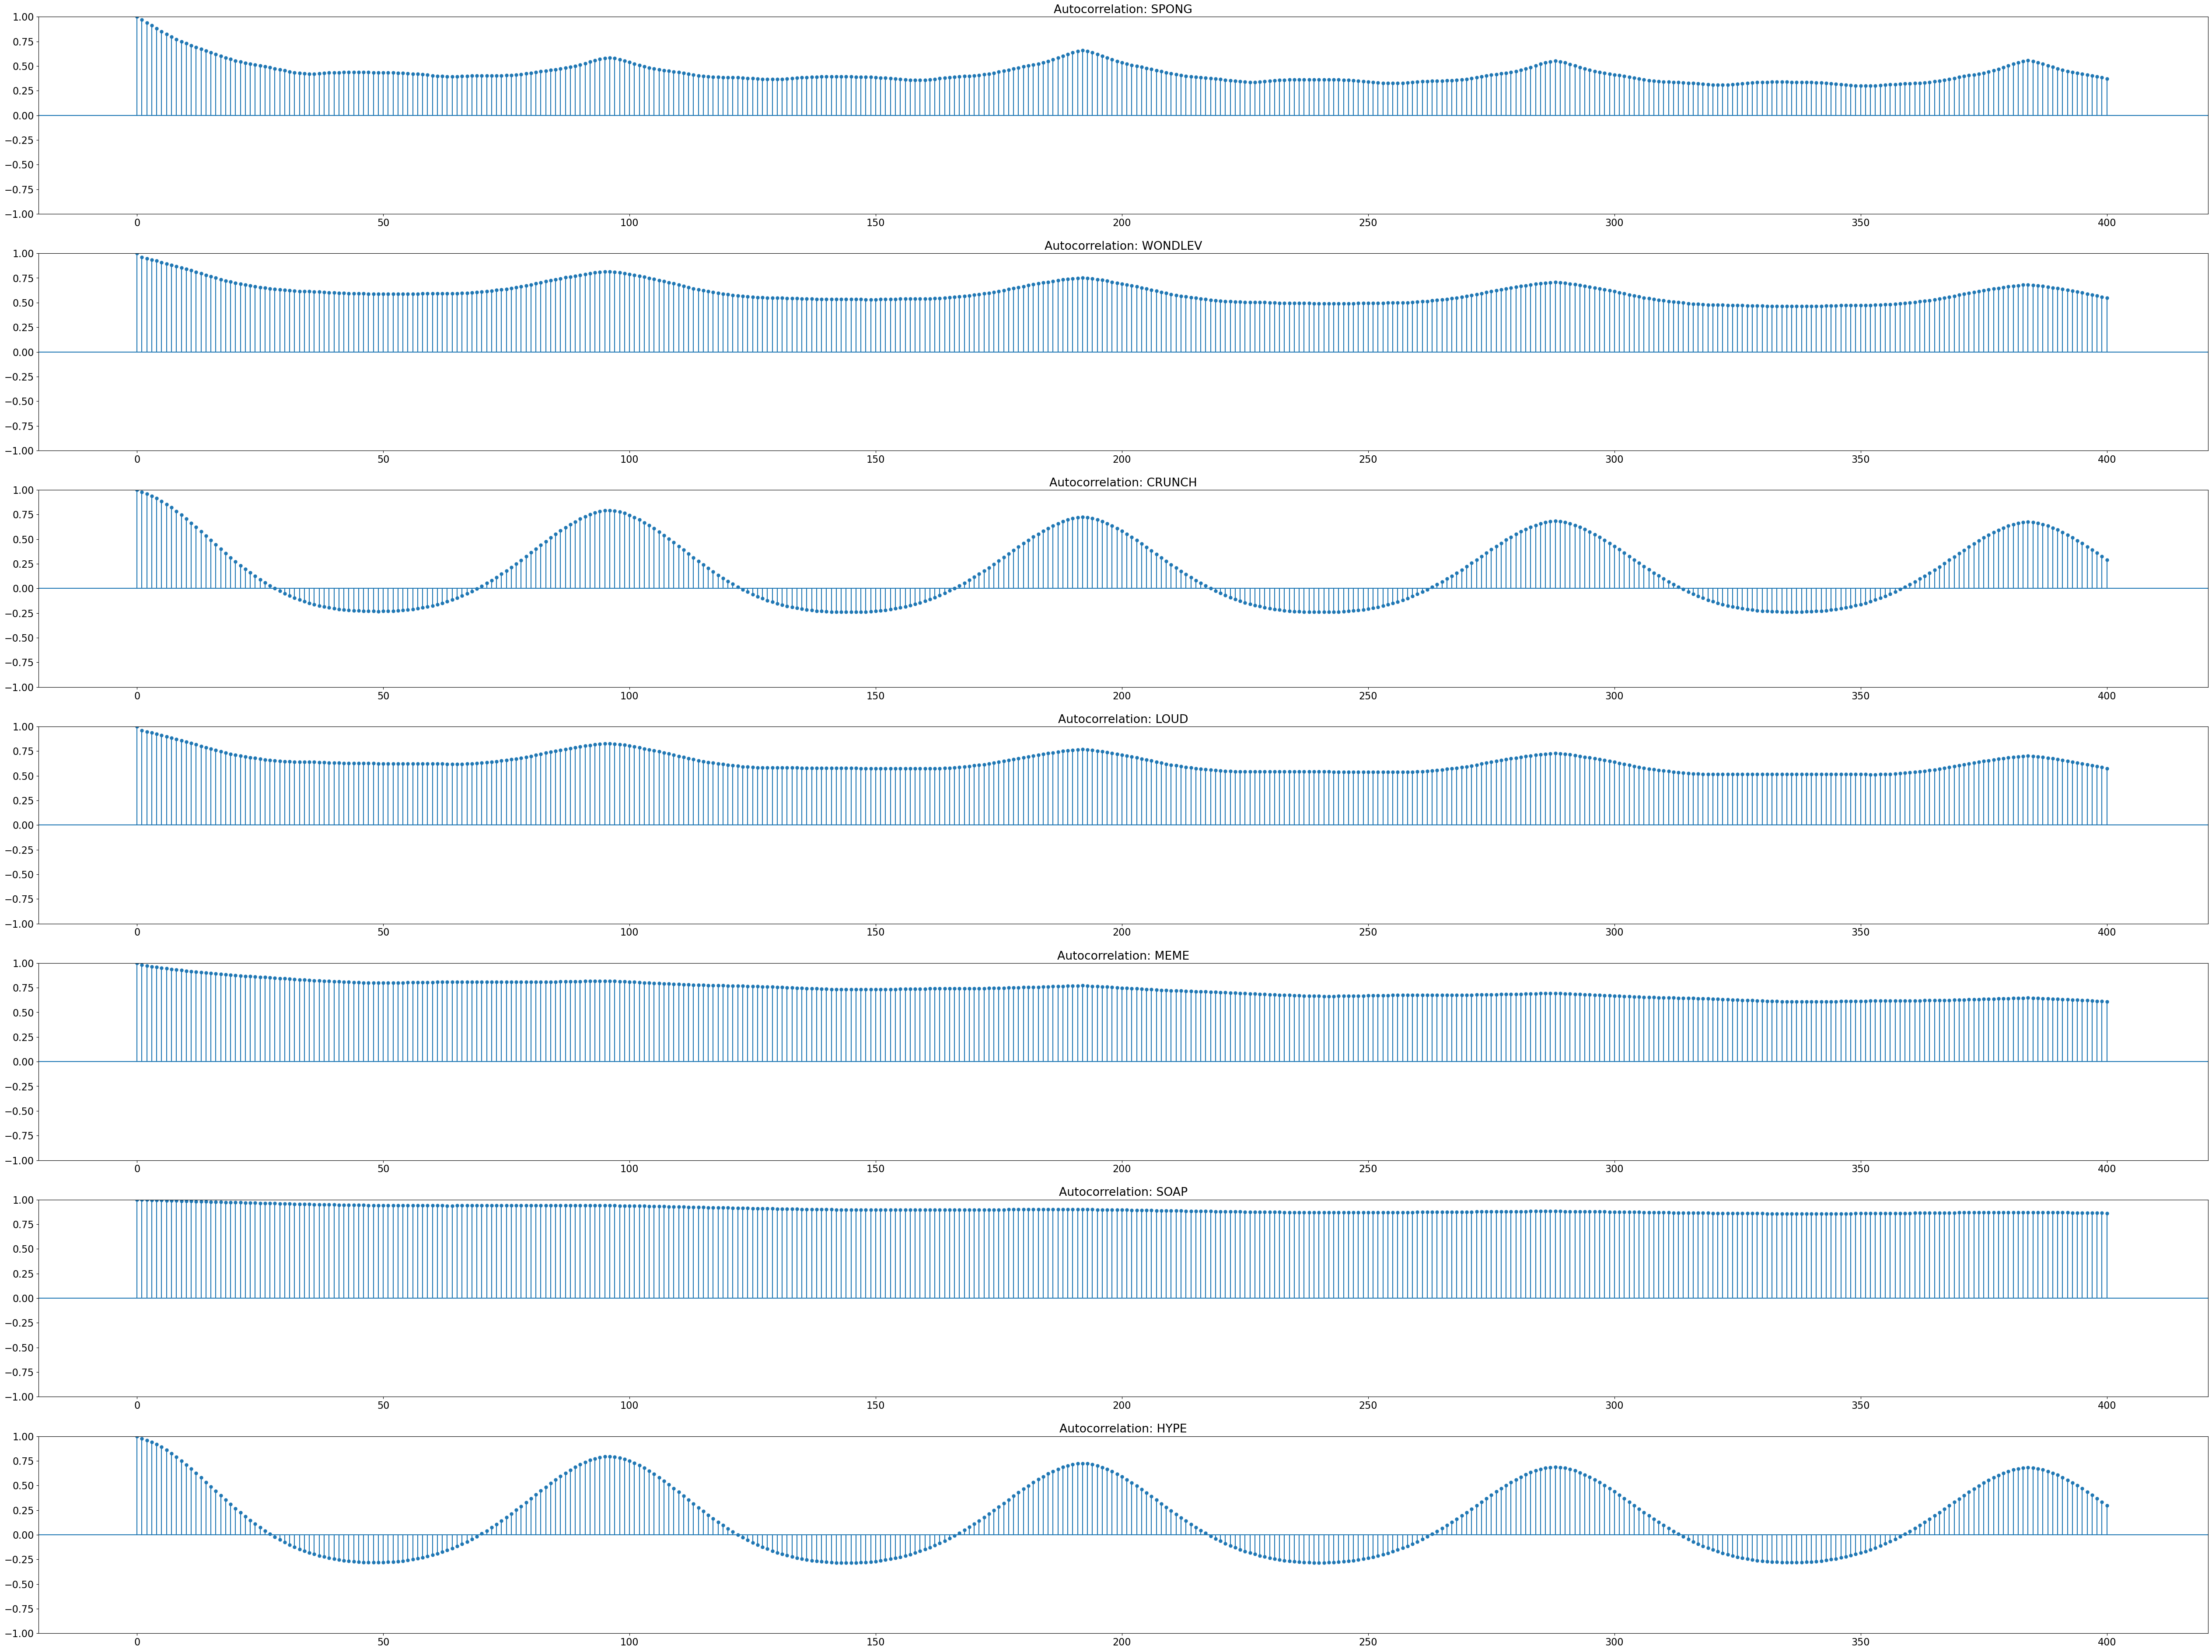

In [18]:
#plot_acf(stocks["SPONG"],lags=20)
#plt.show()

fig, ax = plt.subplots(7,1,figsize=(64,48))


i=1
for col in stocks.columns:
    ax=plt.subplot(7,1,i)
    plot_acf(stocks[col], alpha=1,lags=400, ax=ax)
    ax.set_title("Autocorrelation: "+col)
    i=i+1
    

plt.show()

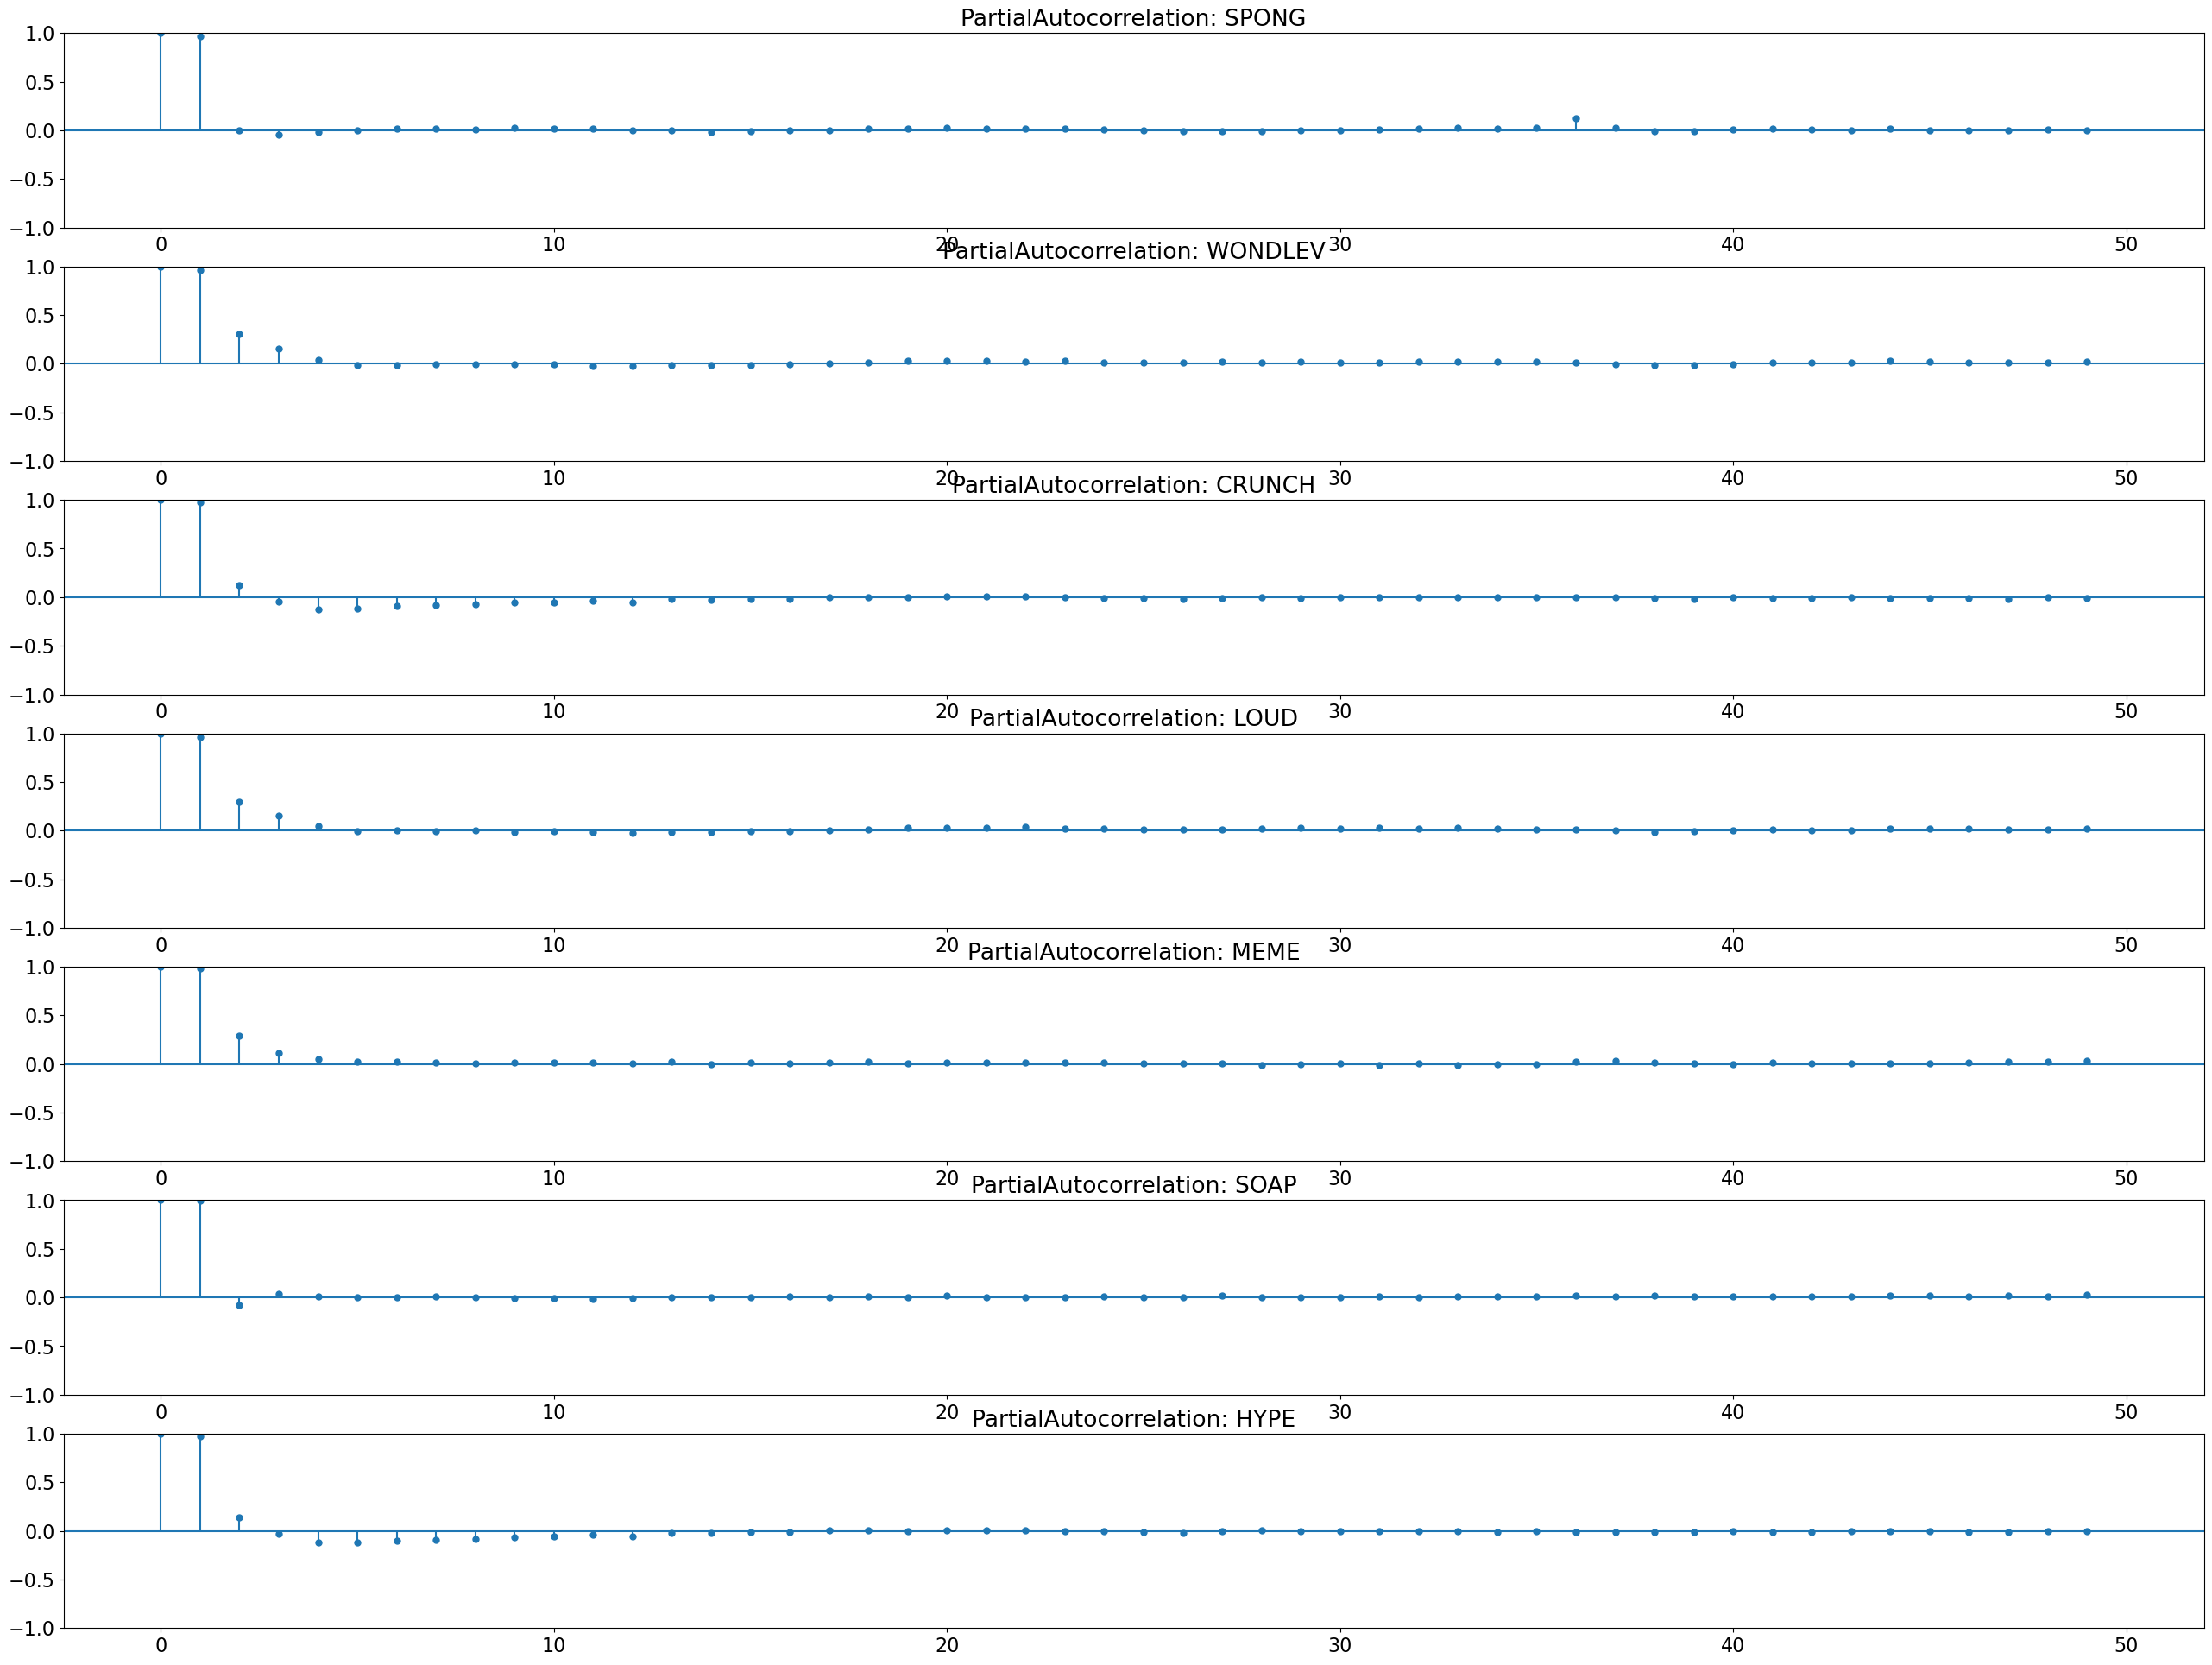

In [19]:
#plot_acf(stocks["SPONG"],lags=20)
#plt.show()

fig, ax = plt.subplots(7,1,figsize=(32,24))


i=1
for col in stocks.columns:
    ax=plt.subplot(7,1,i)
    plot_pacf(stocks[col], alpha=1, ax=ax)
    ax.set_title("PartialAutocorrelation: "+col)
    i=i+1
    

plt.show()

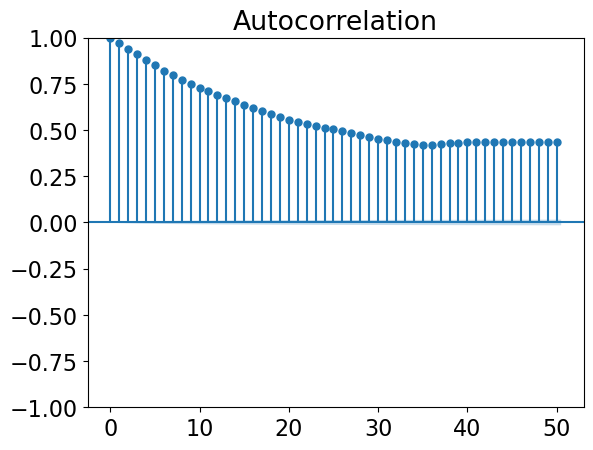

In [20]:
plot_acf(stocks['SPONG'],alpha=0.5,lags=50)
plt.show() 

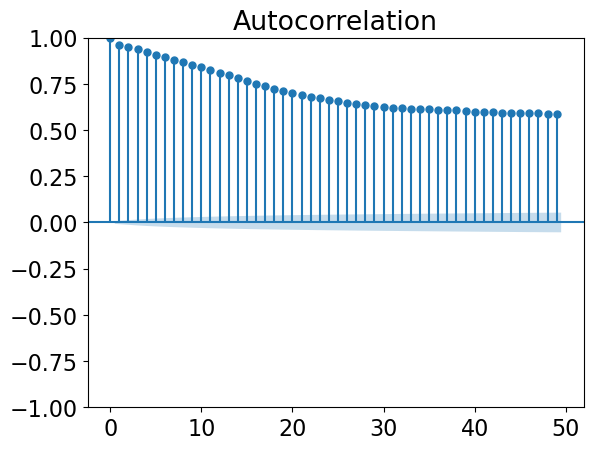

In [21]:
plot_acf(stocks['WONDLEV'])
plt.show()

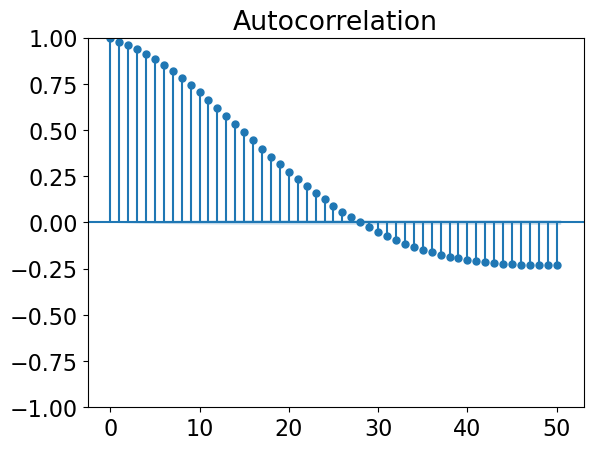

In [22]:
plot_acf(stocks['CRUNCH'],alpha=0.5,lags=50)
plt.show()